# This script is for Plotting PSD data

## How do I grab the PSD data?
Step 1 is to open the software and load your resullts -- you should be on record view
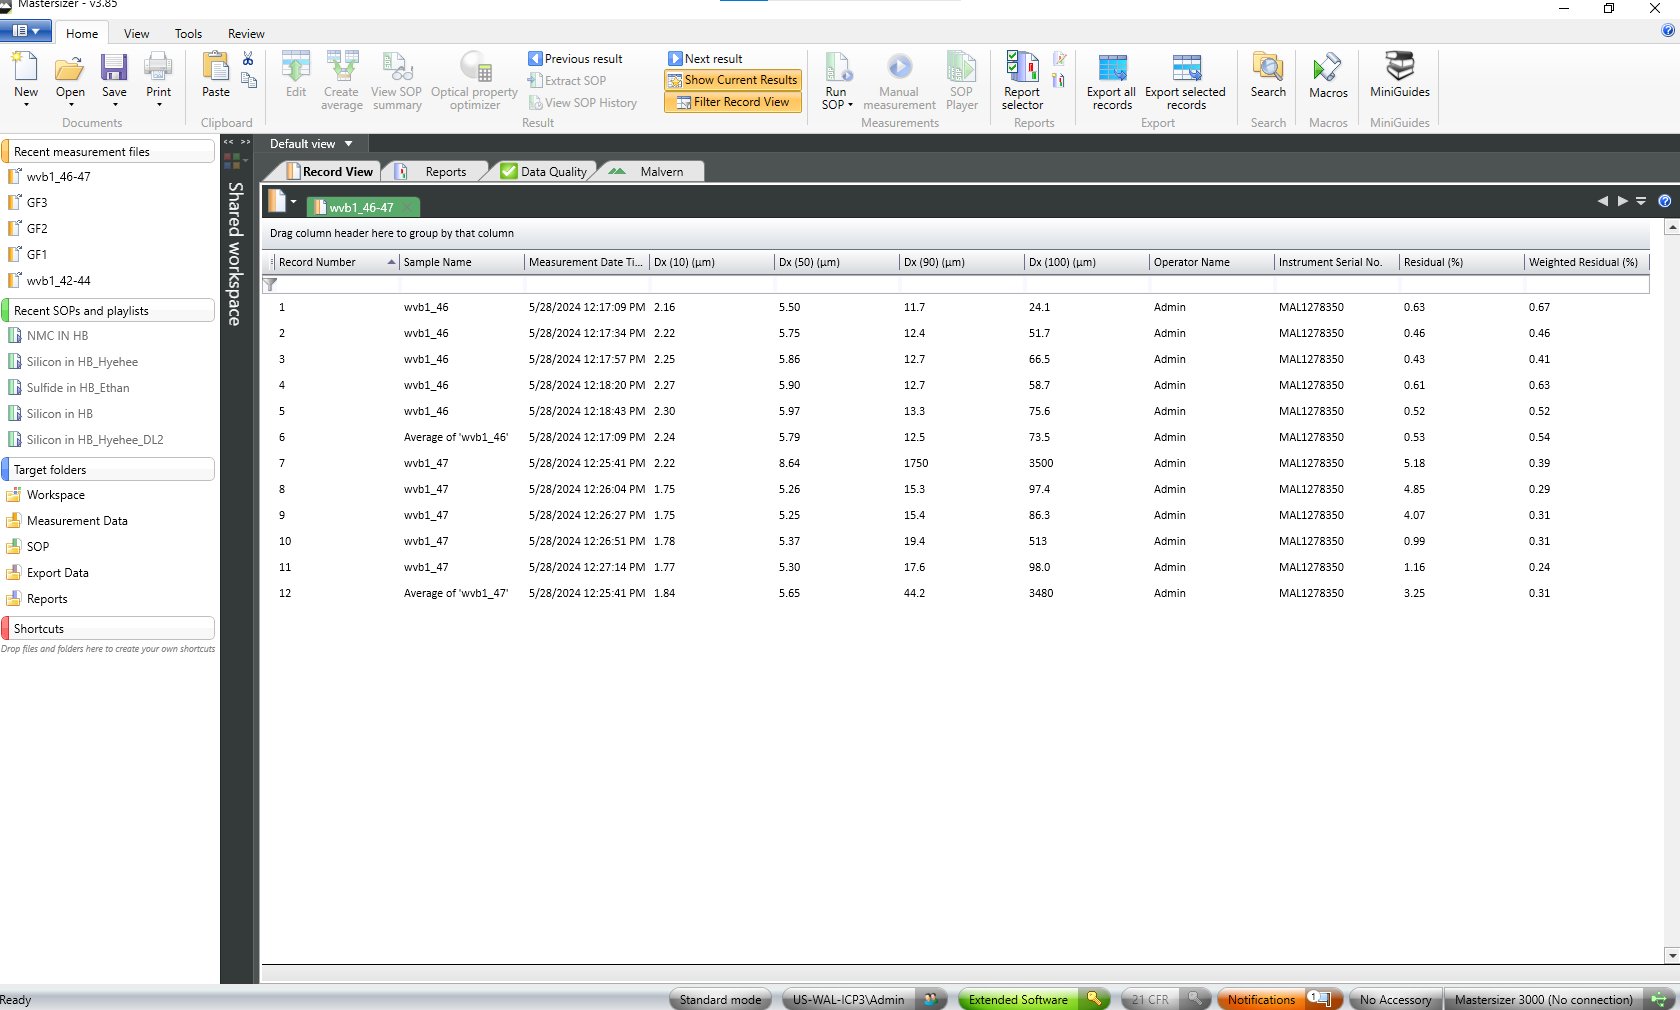

Step 2 is to grab the stats of the PSD data -- select the individual measurements (not average) and click the *Reports* tab and then click the *Result Overlay* sub-tab. Next click the export content button and click export raw data, open a *notepad* (.txt) file and paste (Ctrl+V) the data into the .txt file
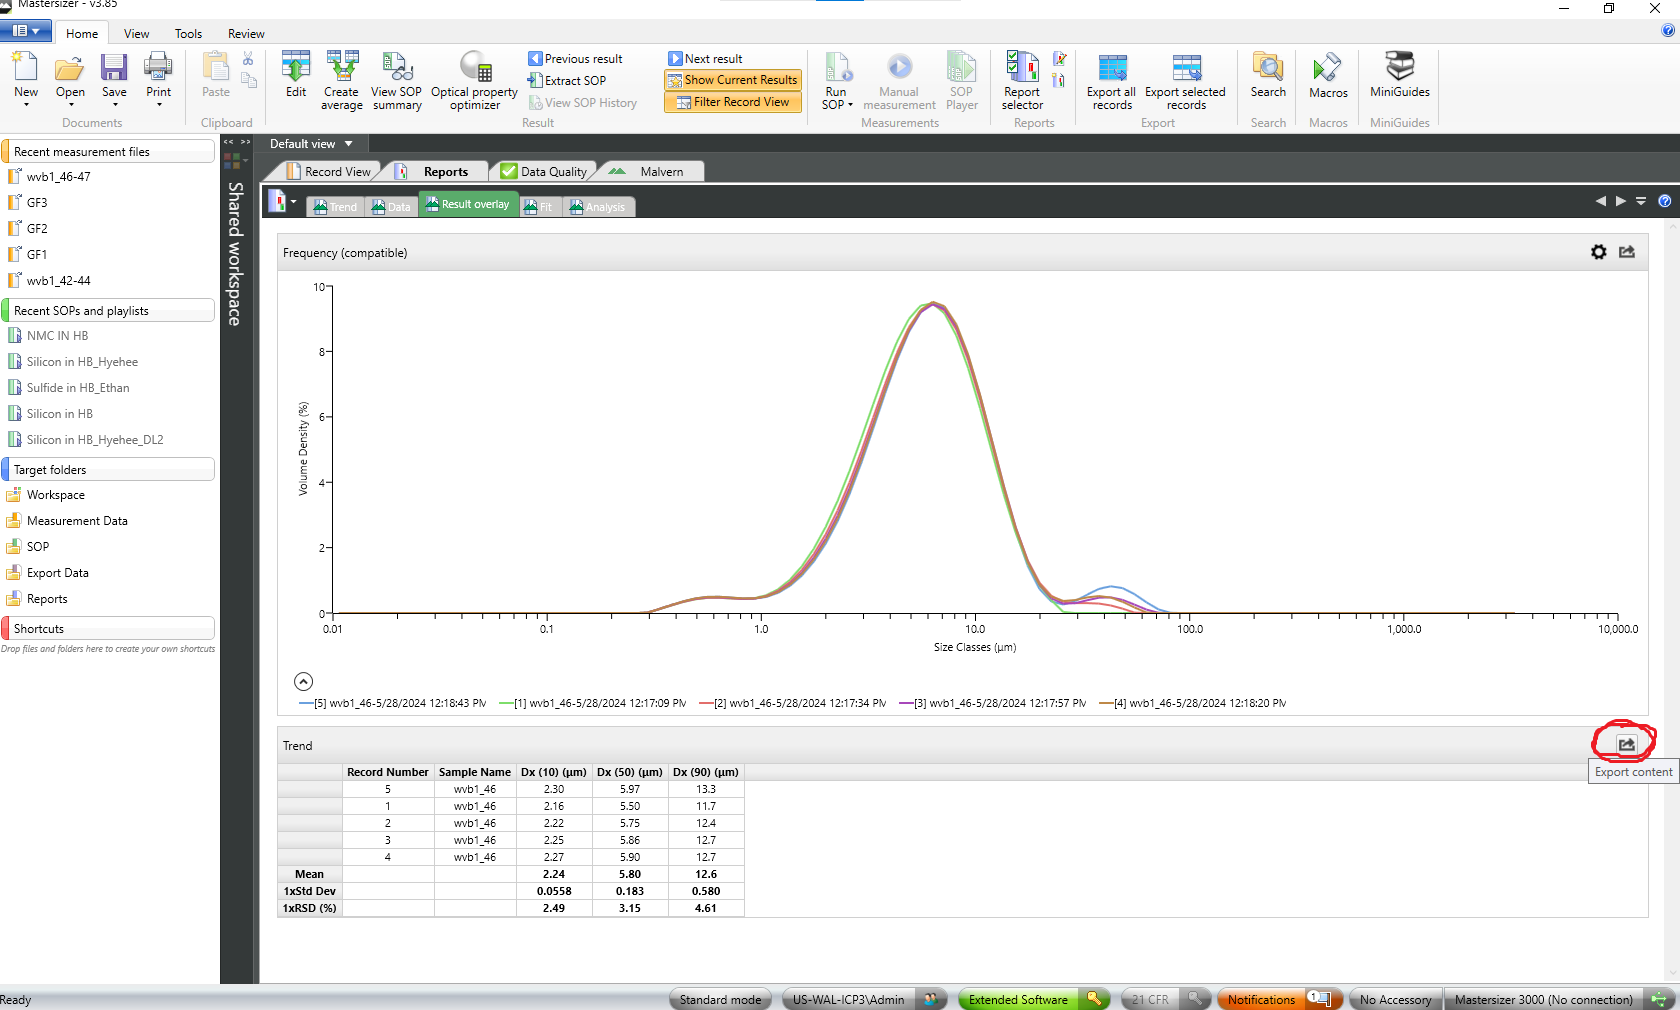

Step 3 is to grab the data for plotting -- select the average of the measurements and repeat the steps of exporting content by going to *Reports* and then *Analysis*
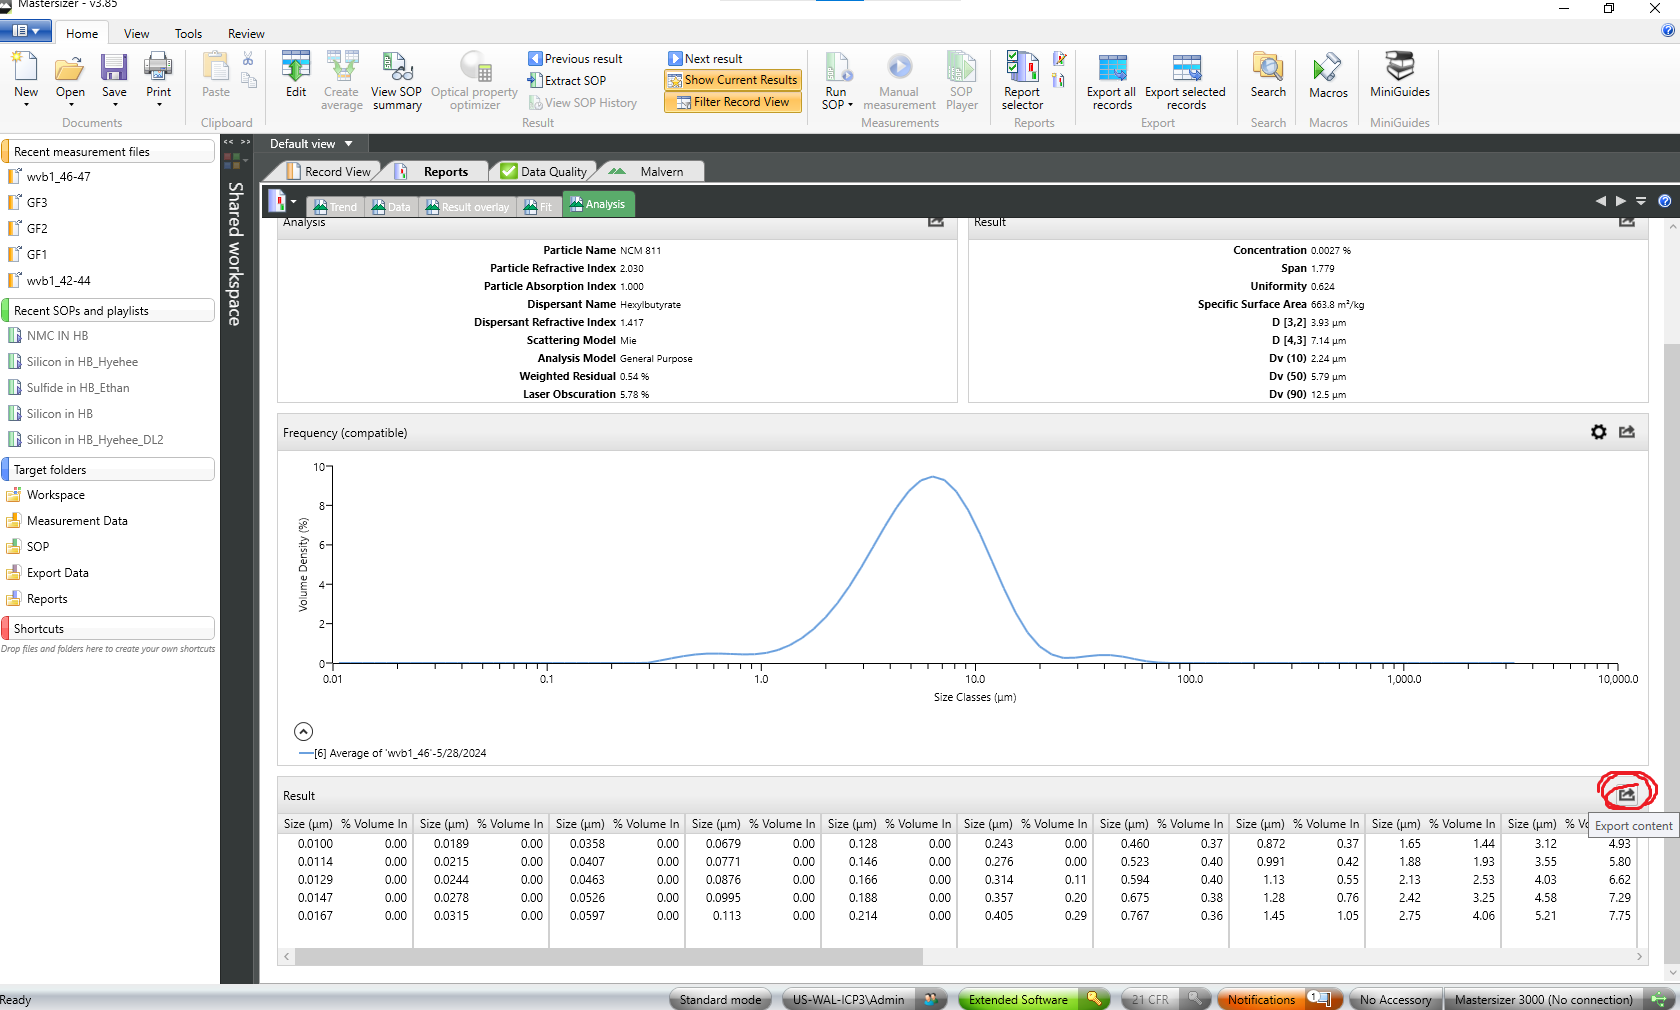

## How should the format be for the files?
The file should be a .txt file with two columns (x and y) which will look like this:
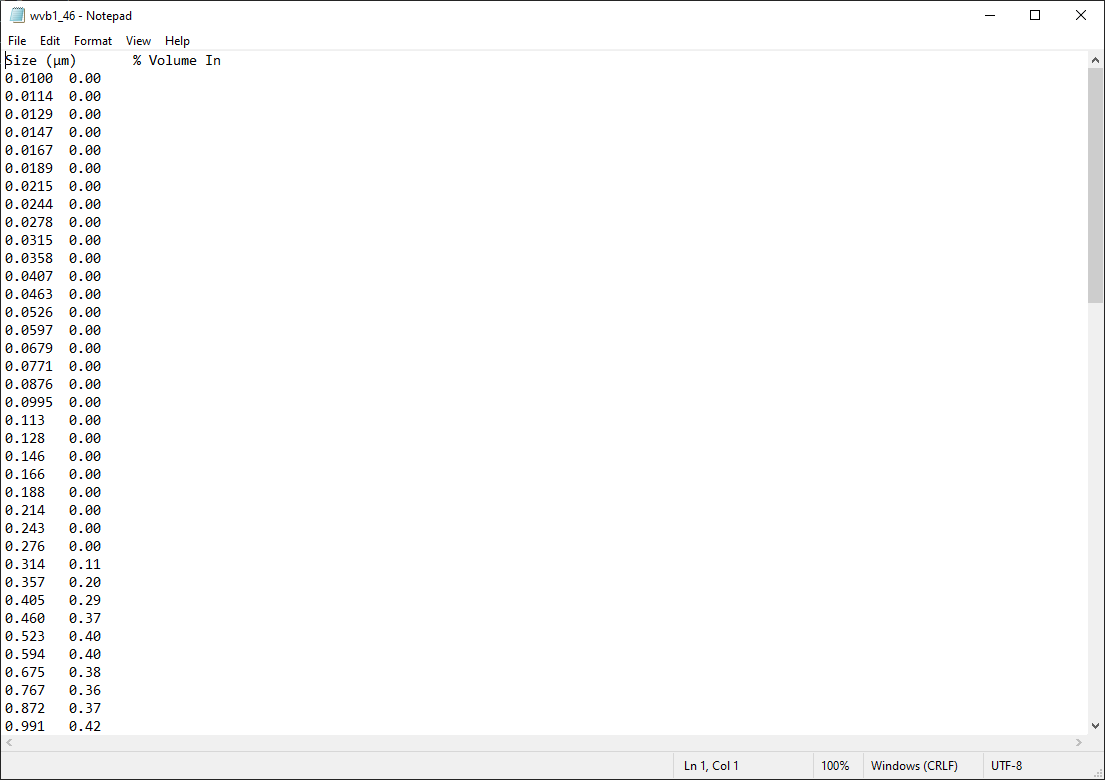

## How do I use this script? I don't know any coding...

No problem, if you can hit Shift+Enter and type into prompts then you are fine.

### Step 1

You should see a blue bar to the left of this text, this refers to which part of the code the system will read next. To have the system read the code, just hit Shift+Enter and it will go to the next "Cell"

### Step 2

Each cell will have a Blurb at the top with a # before it, this is meant to tell you what the cell is doing. There are some cells that you don't need to worry about changing and others that only need very minor input.

Read the blurb, and follow the instructions

You can tell if the cell is done running by either an output such as a number or plot OR it will read "DONE"


In [ ]:
# Don't worry about it, just hit Shift+Enter

#Author: Wess van den Bergh
#Date Modified: Sep 16, 2024
#Environment: v2_Pharmakinetics
#Verified By: 

#NOTES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri as cmc
import warnings
import os
from tkinter import *

def import_data():
    """ grabs data from folders with GUI and then has user provide a custom name for plotting """
    # Create Tk root
    root = Tk()
    # Hide the main window
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    
    from tkinter import filedialog
    infiles = filedialog.askopenfilename(multiple=True)
    
    %gui tk
    
    custom_labels = pd.DataFrame(columns = ['filepath', 'label'])
    custom_labels = pd.concat([custom_labels, pd.DataFrame([{} for _ in range(len(infiles))])], ignore_index=True)
    
    for i,path in enumerate(infiles): 
        custom_labels.loc[i, 'filepath'] = path
        filename = os.path.basename(path)
        custom_labels.loc[i, 'label'] = str(input("Enter a label for {}: ".format(filename)))
        
    return custom_labels
    
def plot_psd_data(custom_labels,
                  line_width = 4,
                  ax_font_size = 14,
                  legend_font_size = 10,
                  legend_pos = "upper left"
                 ):
    """" takes data from import data function and a few plotting parameters and plots the PSD data for clean visualization """
    fig = plt.figure(figsize=(8, 6))

    psd_type = str(input("Is the data number % for the vertical (y-axis) axis? (y/n?) "))
    
    for i in range(len(custom_labels)):
        temp_data = pd.read_csv(custom_labels['filepath'][i], header = 0, sep = '\t')
        plt.plot(temp_data["Size (μm)"], temp_data["% Volume In"], linewidth = line_width, c = cmc.cm.batlow((i/len(custom_labels)*0.8)))
        del temp_data
        
            # Add labels and title
    plt.xlabel('Size (µm)',  fontsize = ax_font_size, fontweight = 'bold')
    
    if psd_type.lower() in ['true', '1', 't', 'y', 'yes']:
        plt.ylabel('Number %',  fontsize = ax_font_size, fontweight = 'bold')
    else:
        plt.ylabel('Volume %',  fontsize = ax_font_size, fontweight = 'bold')
        
    plt.xscale('log')
    plt.xticks(fontsize=ax_font_size, fontweight='bold')
    plt.yticks(fontsize=ax_font_size, fontweight='bold')
    
    plt.tick_params(axis='x', which='major', direction='in', length=12, width=1, colors='k', grid_color='k', grid_alpha=0.5)
    plt.tick_params(axis='x', which='minor', direction='in', length=8, width=1, colors='k', grid_color='k', grid_alpha=0.5)

    plt.box(True)
    plt.gca().spines['top'].set_linewidth(4)    # Set top spine thickness
    plt.gca().spines['bottom'].set_linewidth(4) # Set bottom spine thickness
    plt.gca().spines['left'].set_linewidth(4)   # Set left spine thickness
    plt.gca().spines['right'].set_linewidth(4)  # Set right spine thickness

    legend = plt.legend(custom_labels['label'], framealpha=1, frameon=True, fontsize=legend_font_size, loc=legend_pos)
    frame = legend.get_frame()
    frame.set_edgecolor('black')  # Set legend box color
    frame.set_linewidth(2)        # Set legend box thickness
    for text in legend.get_texts():
        text.set_fontweight('bold')

    plt.grid(True, which = 'major', axis = 'x', linestyle = '--')
    
print("DONE")

In [ ]:
# Don't worry about it, just hit Shift+Enter 
# the entries in plot_psd_data are for changing the features of the plot
psd_data = import_data()
plot_psd_data(psd_data, 
              line_width = 4,
              ax_font_size = 14,
              legend_font_size = 10,
              legend_pos = "upper left"
             )

## How do I save my plot?

Shift+Right Click the plot and save the image!

## I want to change something!

No problem, just click the circular arrow/restart kernel and it will ask you if you do want to restart the kernel. Click restart kernel.

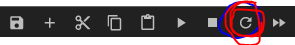

This isn't necessary if you are familiar with coding but if you want a clean slate, just go ahead and do it and start from the beginning